In [2]:
import import_ipynb
import matplotlib.pyplot as plt  # To visualize
from sklearn.linear_model import LinearRegression

from BabiloniaDataAnalytics import BabiloniaDataAnalytics
bda = BabiloniaDataAnalytics('../../server/app/config.json')

In [3]:
bda.plot_node_moisture()
# Range: 1608951601 – 1609037999 / MUX2 => level shift

In [4]:
mux = bda.NODE_MOISTURE_DATA[(bda.NODE_MOISTURE_DATA.index > 1608984303) & (bda.NODE_MOISTURE_DATA.index < 1609037998)]['MUX2'].to_frame().rolling(120).mean().dropna() # 120 ~ 1 hour

In [5]:
mux.reset_index(level=0, inplace=True)
mux.tail()

,TIMESTAMP,MUX2
1671,1609037851,296
1672,1609037881,296
1673,1609037911,296
1674,1609037941,296
1675,1609037971,296


In [6]:
linear_regressor = LinearRegression()  # create object for the class

In [7]:
X = mux.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array

In [8]:
Y = mux.iloc[:, 1].values.reshape(-1, 1) 

In [9]:
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

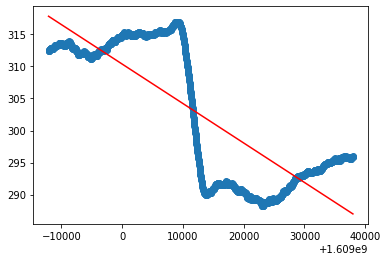

In [10]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [ ]:
linear_regressor.score(X,Y)

In [ ]:
linear_regressor.coef_